# Stock Index Intro KMeans Clustering 


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'


from sklearn.cluster import KMeans
from sklearn import preprocessing

In [81]:
start_date='2007-01-01'
end_date='2020-12-31'

my_features=['SIGNAL_MACD', 'MA_RSI']
#my_features=['SIGNAL_MACD', 'MA_RSI','Close-To_Mid']
cols=['Price']+my_features
print(cols)

['Price', 'SIGNAL_MACD', 'MA_RSI']


In [82]:
dfAll=pd.read_csv('data\SET50_W_ClusterTrend_07-Now.csv',parse_dates=['Date/Time'],dayfirst=True)

dfAll.rename(columns={'Date/Time':'Date'},inplace=True,)
dfAll['Date']=dfAll['Date'].apply( lambda  dx :  datetime(dx.year,dx.month,dx.day ))
dfAll.set_index('Date',inplace=True)
print(dfAll.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829 entries, 2007-01-05 to 2022-11-18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ticker        829 non-null    object 
 1   SIGNAL_MACD   829 non-null    float64
 2   MA_RSI        829 non-null    float64
 3   Close-To_Mid  829 non-null    float64
 4   Price         829 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.9+ KB
None


In [83]:
dfTest=dfAll[end_date:][cols]
print(dfTest.info())
dfTest.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2021-01-08 to 2022-11-18
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        98 non-null     float64
 1   SIGNAL_MACD  98 non-null     float64
 2   MA_RSI       98 non-null     float64
dtypes: float64(3)
memory usage: 3.1 KB
None


,Price,SIGNAL_MACD,MA_RSI
Date,,,
2022-10-21,961.60,-2.89,44.24
2022-10-28,976.57,-2.99,44.34
2022-11-04,989.77,-2.78,46.68
2022-11-11,1001.30,-2.24,49.99
2022-11-18,981.62,-1.73,52.53


In [84]:
df=dfAll[start_date:end_date][cols]
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2007-01-05 to 2020-12-30
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        731 non-null    float64
 1   SIGNAL_MACD  731 non-null    float64
 2   MA_RSI       731 non-null    float64
dtypes: float64(3)
memory usage: 22.8 KB
None


,Price,SIGNAL_MACD,MA_RSI
Date,,,
2020-12-04,940.17,-14.22,55.15
2020-12-09,958.49,-10.28,59.25
2020-12-18,947.28,-6.32,60.68
2020-12-25,918.35,-2.83,60.45
2020-12-30,910.45,0.11,59.35


# Scale Data

In [85]:
zScaler = preprocessing.StandardScaler().fit(df[my_features]) # create StandardScaler instance
zScaledData=zScaler.fit_transform(df[my_features]) # calc z-score

print(zScaledData.shape)
print(zScaledData[:5].round(4)) # 2D numpy array

z_features = [f'zScale_{c}' for c in my_features]
print(z_features)


(731, 2)
[[-0.0882 -0.6244]
 [-0.1561 -0.9468]
 [-0.2228 -1.2091]
 [-0.2859 -1.2091]
 [-0.338  -1.1548]]
['zScale_SIGNAL_MACD', 'zScale_MA_RSI']


In [87]:
## Yeo-Johnson transformation (preferable)
pwtScaler = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True).fit(df[my_features]) # support only positive value
pwtScaledData=pwtScaler.transform(df[my_features]) # calc power transform

print(pwtScaledData.shape)
print(pwtScaledData[:5].round(4)) # 2D numpy array

pwt_features = [f'pwtScale_{c}' for c in my_features]
print(pwt_features)


(731, 2)
[[-0.2834 -0.6515]
 [-0.3537 -0.9598]
 [-0.4164 -1.2049]
 [-0.4724 -1.2049]
 [-0.5171 -1.1546]]
['pwtScale_SIGNAL_MACD', 'pwtScale_MA_RSI']


In [88]:
dfScaled=pd.concat([df.reset_index(),pd.DataFrame(zScaledData, columns=z_features), pd.DataFrame(pwtScaledData, columns=pwt_features)], axis=1)
print(dfScaled.info())
dfScaled.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  731 non-null    datetime64[ns]
 1   Price                 731 non-null    float64       
 2   SIGNAL_MACD           731 non-null    float64       
 3   MA_RSI                731 non-null    float64       
 4   zScale_SIGNAL_MACD    731 non-null    float64       
 5   zScale_MA_RSI         731 non-null    float64       
 6   pwtScale_SIGNAL_MACD  731 non-null    float64       
 7   pwtScale_MA_RSI       731 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 45.8 KB
None


,Date,Price,SIGNAL_MACD,MA_RSI,zScale_SIGNAL_MACD,zScale_MA_RSI,pwtScale_SIGNAL_MACD,pwtScale_MA_RSI
726,2020-12-04,940.17,-14.22,55.15,-1.013507,0.151434,-1.039714,0.120629
727,2020-12-09,958.49,-10.28,59.25,-0.774600,0.493859,-0.862702,0.473772
728,2020-12-18,947.28,-6.32,60.68,-0.534481,0.613290,-0.677431,0.598617
729,2020-12-25,918.35,-2.83,60.45,-0.322861,0.594080,-0.504216,0.578480
730,2020-12-30,910.45,0.11,59.35,-0.144590,0.502210,-0.342222,0.482474


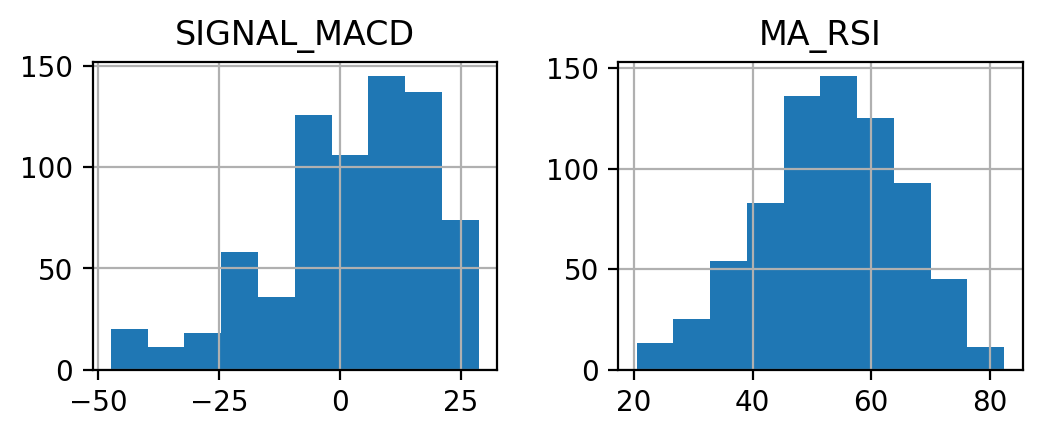

In [89]:
dfScaled[my_features].hist(layout=(1, len(my_features)), figsize=(3*len(my_features), 2));

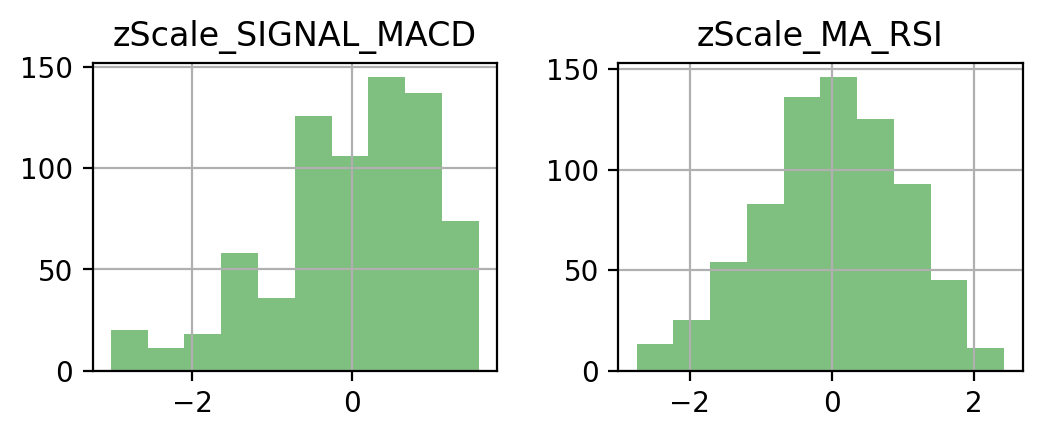

In [90]:
dfScaled[z_features].hist(layout=(1, len(my_features)), figsize=(3*len(my_features), 2),color='green',alpha=.5);

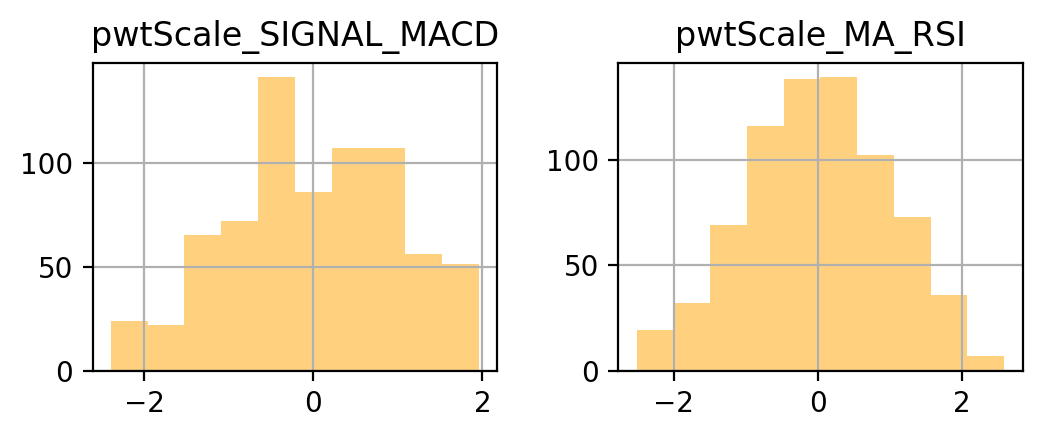

In [91]:
dfScaled[pwt_features].hist(layout=(1, len(my_features)), figsize=(3*len(my_features), 2),color='orange',alpha=.5);

In [92]:
scaleType='pwt'

In [93]:
print(scaleType)
if scaleType=='z':
 X=pd.DataFrame(zScaledData, columns=my_features) ## z-score  (preferable)
elif scaleType=='pwt':
 X=pd.DataFrame(pwtScaledData, columns=my_features) ## power transformation 
X.head()

pwt


,SIGNAL_MACD,MA_RSI
0,-0.283416,-0.651456
1,-0.353670,-0.959848
2,-0.416437,-1.204881
3,-0.472391,-1.204881
4,-0.517088,-1.154603


## Scatter matrix with transformed data

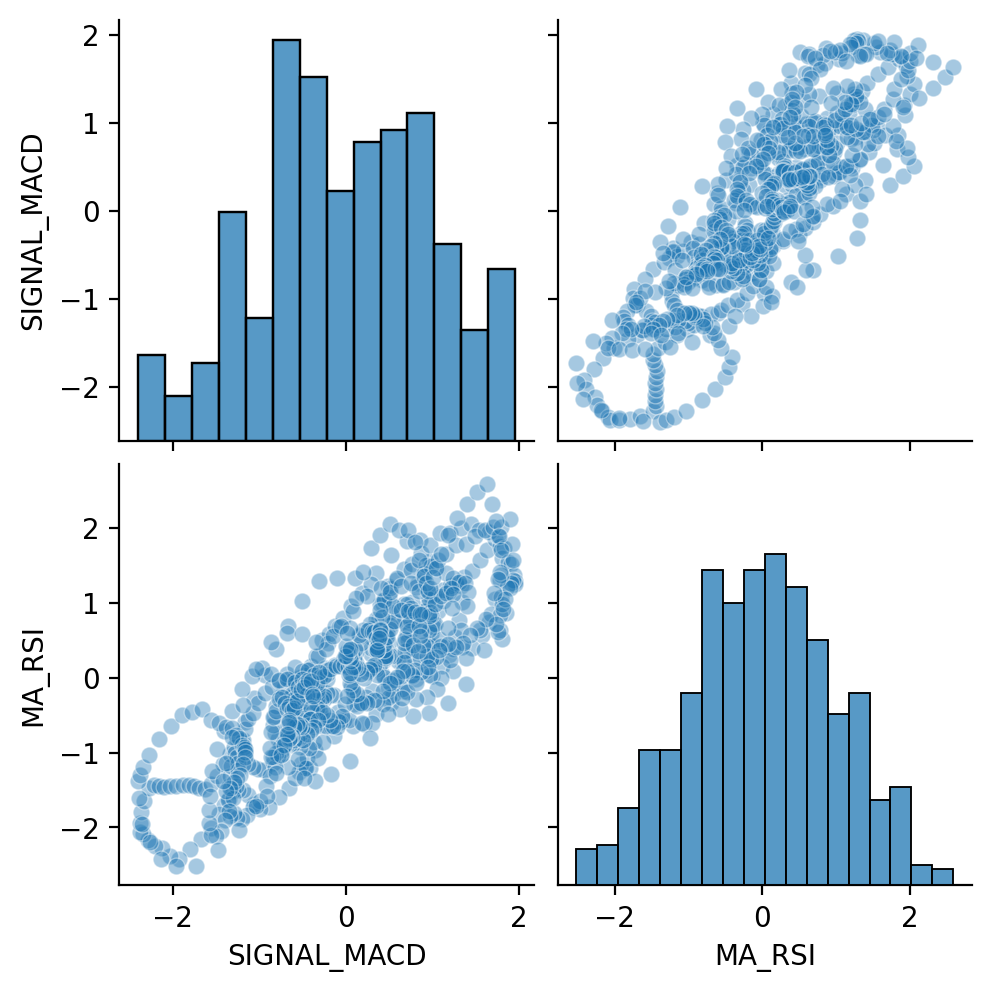

In [94]:
sns.pairplot(X, plot_kws={'alpha': .4});

# Optimal number of clusters eBlow

In [95]:
ssd=[]
for k in range(2, 7):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
xy=np.array(ssd)
print(xy)

[[  2.         534.16023341]
 [  3.         339.29255422]
 [  4.         231.60818167]
 [  5.         195.31592326]
 [  6.         168.13297499]]


In [96]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,534.160233,NaN
1,3,339.292554,-36.481128
2,4,231.608182,-31.737912
3,5,195.315923,-15.669679
4,6,168.132975,-13.917426


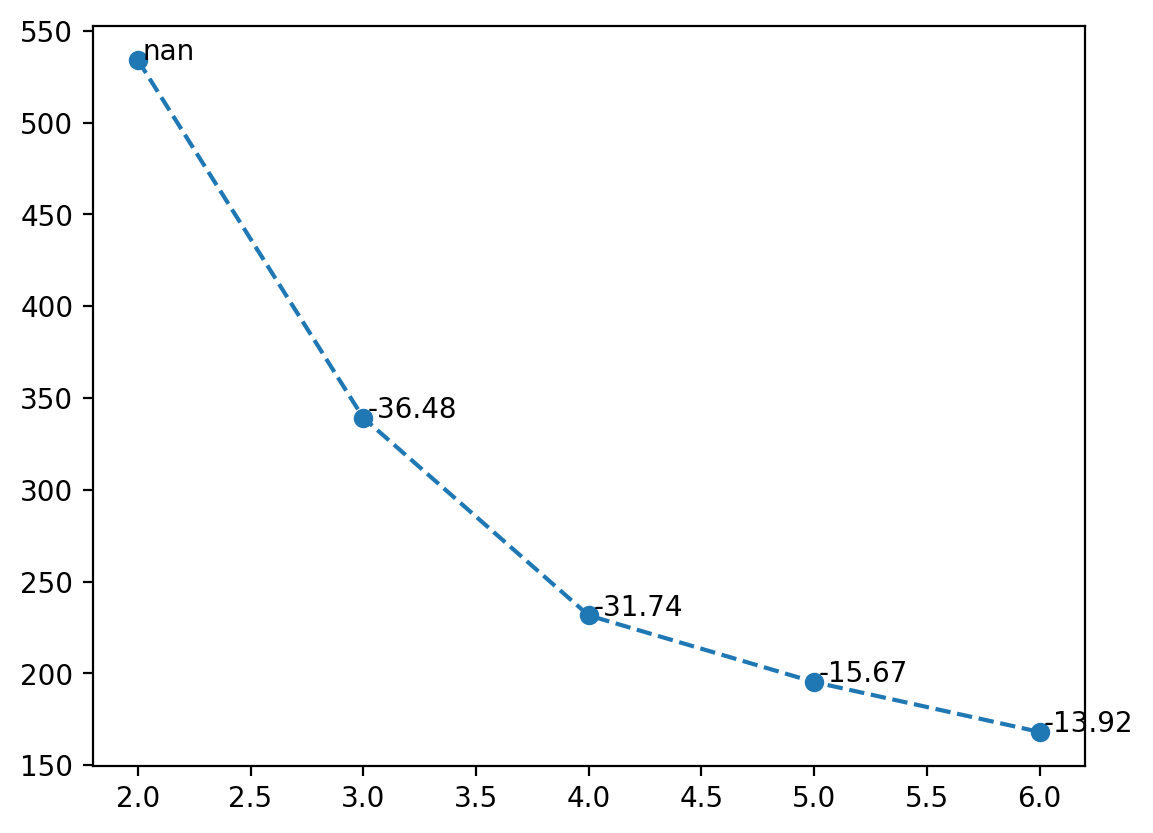

In [97]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

# Scikit-learn: KMeans Clustering

In [98]:
model=KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [99]:
print(X[:5])
model.fit(X)

   SIGNAL_MACD    MA_RSI
0    -0.283416 -0.651456
1    -0.353670 -0.959848
2    -0.416437 -1.204881
3    -0.472391 -1.204881
4    -0.517088 -1.154603


KMeans(n_clusters=3)

In [100]:
model.cluster_centers_
#model.transform(X) # the distance between each point and centroid

array([[-1.36690684, -1.371357  ],
       [ 0.99824727,  0.97786785],
       [-0.22678776, -0.20650519]])

In [101]:
df['cluster']=model.labels_
X['cluster']=model.labels_
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2007-01-05 to 2020-12-30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        731 non-null    float64
 1   SIGNAL_MACD  731 non-null    float64
 2   MA_RSI       731 non-null    float64
 3   cluster      731 non-null    int32  
dtypes: float64(3), int32(1)
memory usage: 25.7 KB
None


,Price,SIGNAL_MACD,MA_RSI,cluster
Date,,,,
2007-01-05,436.50,1.04,45.86,2
2007-01-12,453.12,-0.08,42.00,2
2007-01-19,461.39,-1.18,38.86,0
2007-01-26,460.01,-2.22,38.86,0
2007-02-02,468.30,-3.08,39.51,0


In [102]:
dfStat=(df.groupby('cluster',as_index=True).describe()).T
dfStat

cluster                      0            1            2
Price       count   149.000000   274.000000   308.000000
            mean    717.018523   818.058467   886.357143
            std     253.487004   224.541710   212.775451
            min     272.890000   403.690000   374.940000
            25%     464.870000   615.880000   727.600000
            50%     829.000000   832.695000   964.600000
            75%     895.840000  1013.975000  1066.412500
            max    1126.250000  1194.870000  1159.540000
SIGNAL_MACD count   149.000000   274.000000   308.000000
            mean    -22.175973    17.515693     1.066364
            std      12.108476     5.889330     6.874999
            min     -47.350000     0.570000   -17.850000
            25%     -28.060000    13.332500    -4.010000
            50%     -20.240000    17.215000     0.545000
            75%     -14.790000    21.627500     6.257500
            max      -0.150000    28.720000    17.230000
MA_RSI      count   149.000000   274.000000   308.000000
            mean     36.520671    64.879088    51.203766
            std       6.459632     6.329611     4.990603
            min      20.420000    49.730000    37.870000
            25%      32.400000    60.077500    47.077500
            50%      37.080000    64.410000    51.080000
            75%      41.310000    68.922500    54.932500
            max      48.790000    82.420000    65.520000

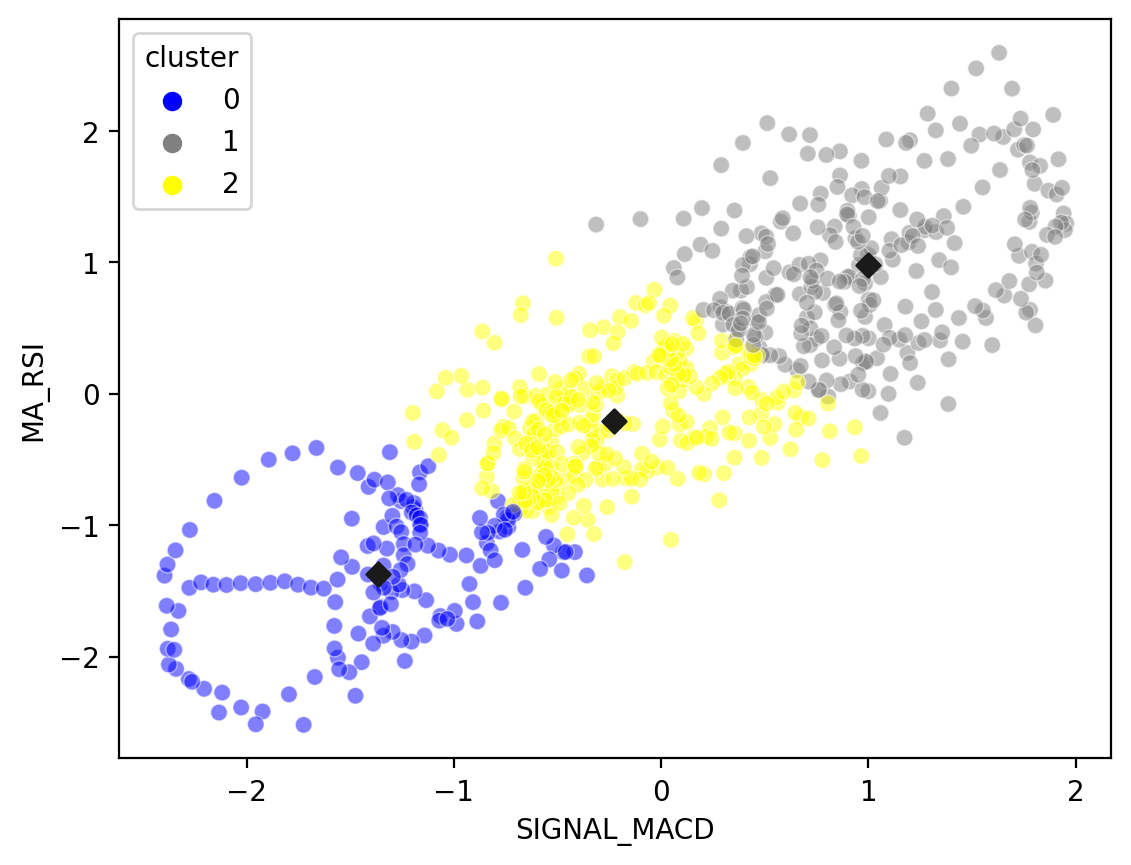

In [103]:
# 2 dimension
sns.scatterplot(data=X, x=my_features[0], y=my_features[1], hue='cluster', alpha=.5, palette=['blue', 'gray', 'yellow'])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker='D')

# Map ClsterLabel  To Amibroker

In [104]:
dict_clusterToAB={0:'1', 1:'3', 2:'2'}

In [105]:
df['MarketTrend'] = df['cluster'].map(dict_clusterToAB)
#df[['Price','MarketTrend']].to_csv( 'ab-visual/TrainCluster3Trend-S50-ZScale.csv')
df.tail()

,Price,SIGNAL_MACD,MA_RSI,cluster,MarketTrend
Date,,,,,
2020-12-04,940.17,-14.22,55.15,2,2
2020-12-09,958.49,-10.28,59.25,2,2
2020-12-18,947.28,-6.32,60.68,2,2
2020-12-25,918.35,-2.83,60.45,2,2
2020-12-30,910.45,0.11,59.35,2,2


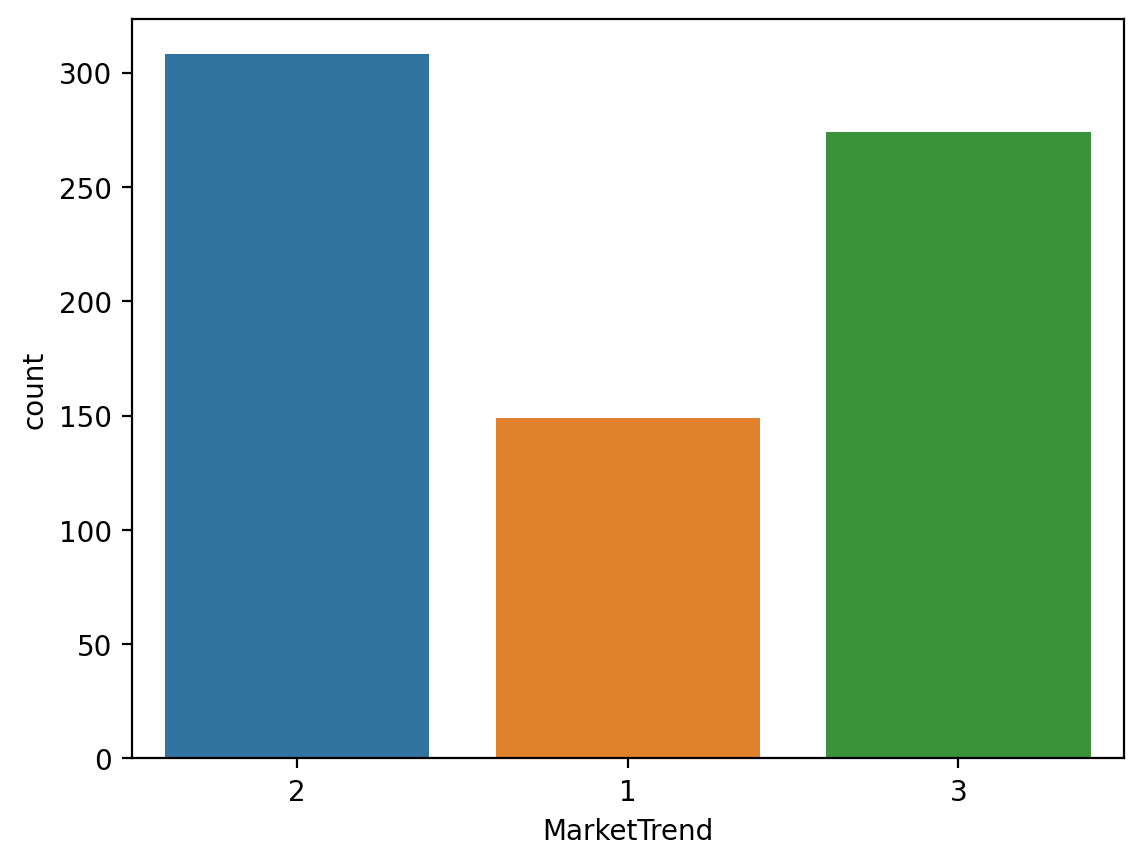

In [106]:
sns.countplot(x='MarketTrend', data=df);

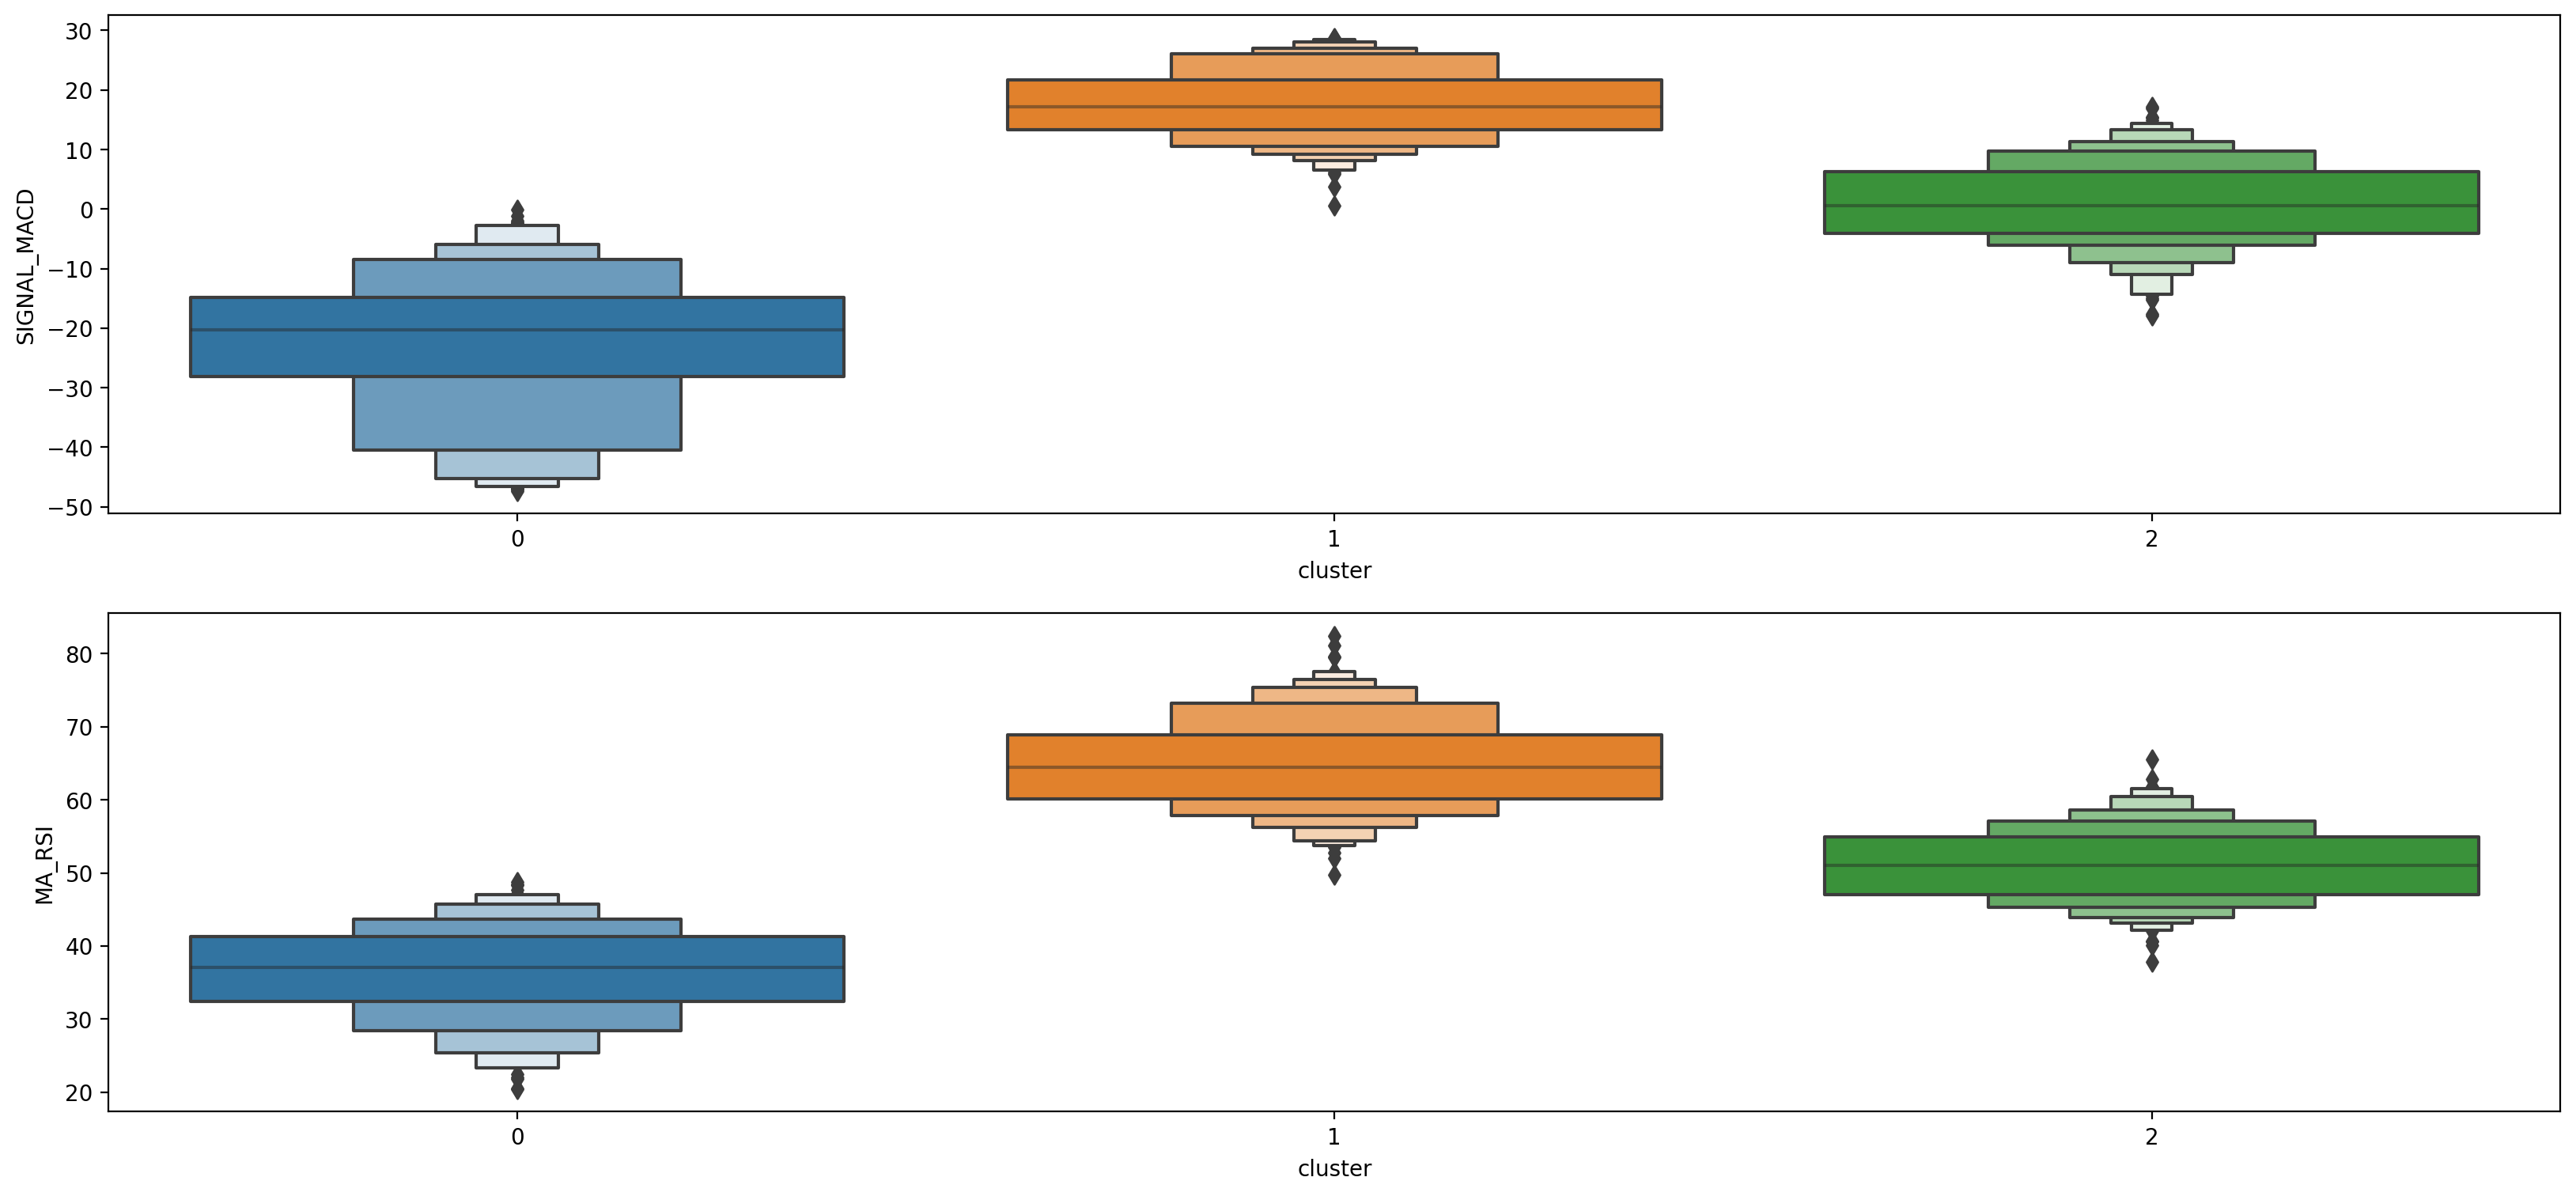

In [107]:
# fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(12,9), sharex=True,)

# ax1.plot(df['Close'])
# ax2.bar(df.index,df['MarketLabel'])
# ax3.plot(df[my_features[0]])
# ax4.plot(df[my_features[1]])

# plt.show()

fig, ax = plt.subplots(nrows=len(my_features), ncols=1, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(my_features):
    sns.boxenplot(x='cluster', y=col, data=df, ax=ax[i])

# Raw data (no scaling)

In [109]:
df.groupby('cluster').median()

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_5656\704907052.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').median()


,Price,SIGNAL_MACD,MA_RSI
cluster,,,
0,829.000,-20.240,37.08
1,832.695,17.215,64.41
2,964.600,0.545,51.08


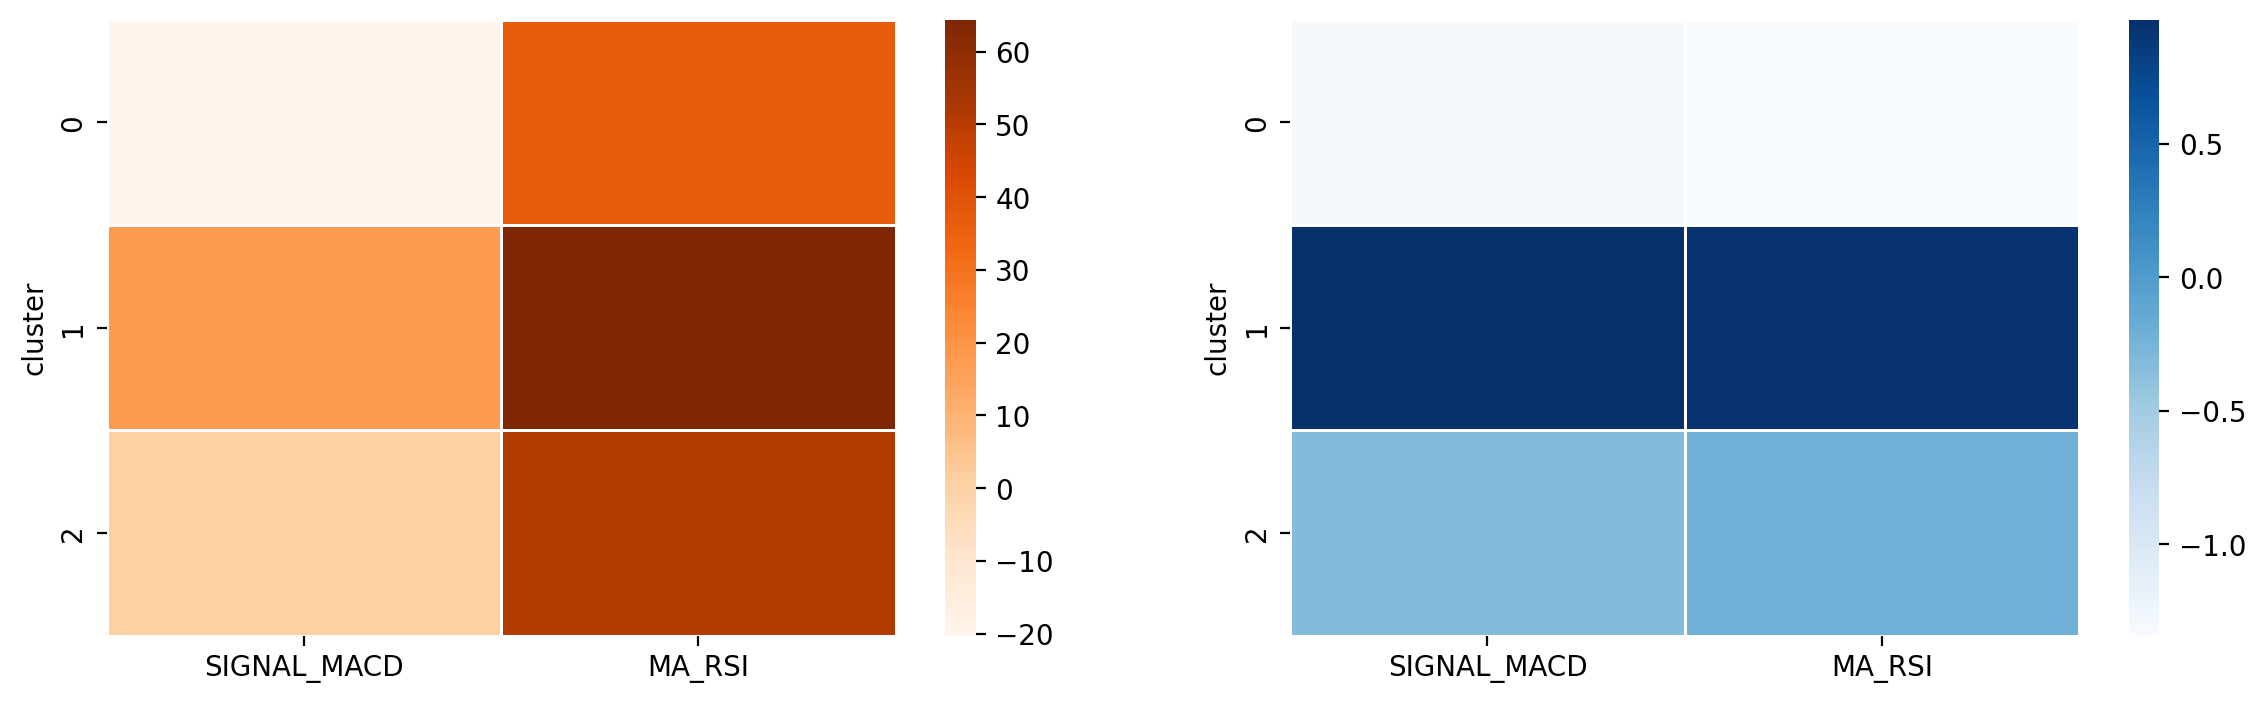

In [110]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax=ax.ravel()
sns.heatmap(df[my_features+['cluster']].groupby('cluster').median(), cmap="Oranges", linewidths=1, ax=ax[0]);
sns.heatmap(X[my_features+['cluster']].groupby('cluster').median(), cmap="Blues", linewidths=1, ax=ax[1]);

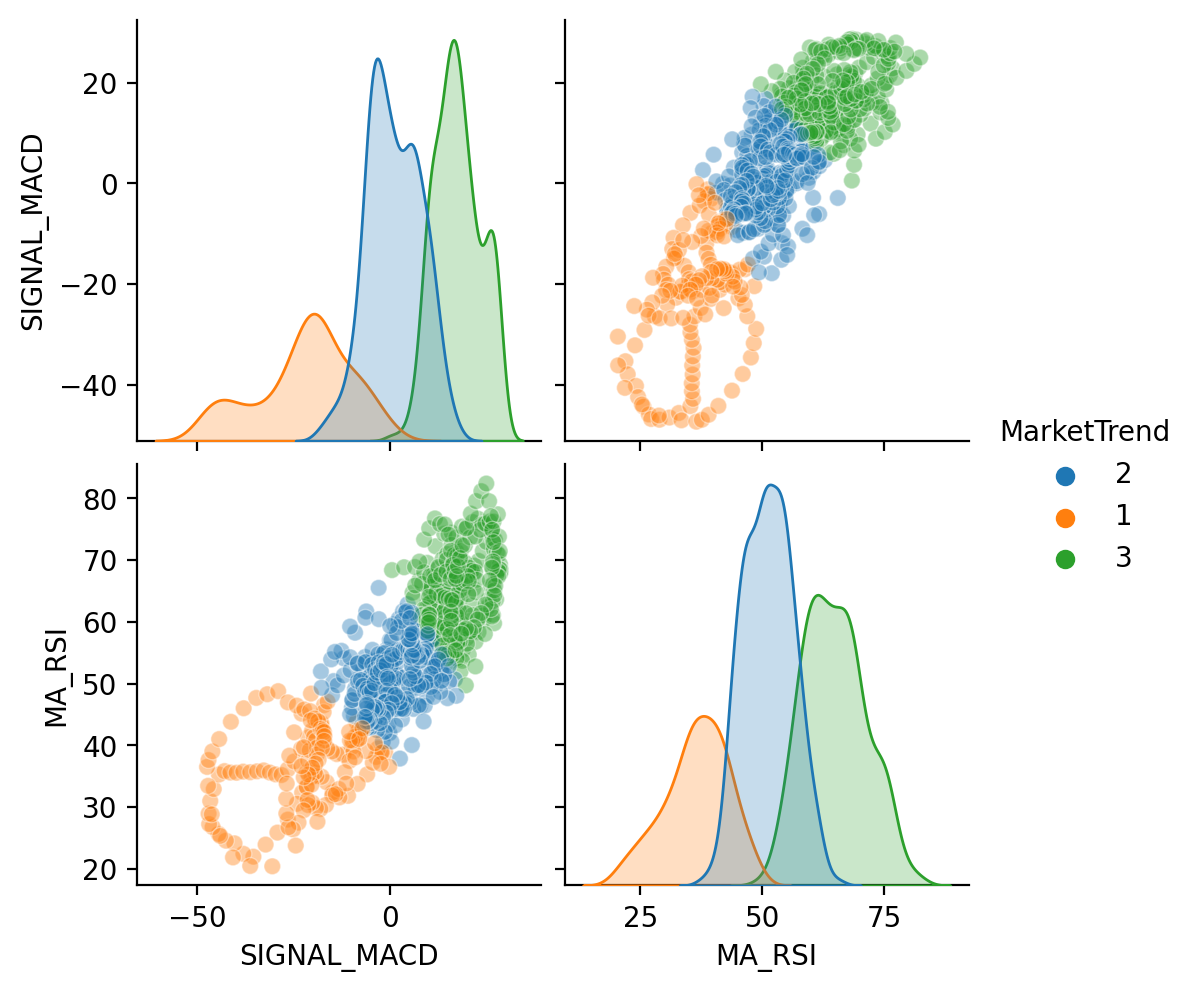

In [114]:
sns.pairplot(df, vars=my_features, 
             hue='MarketTrend',
             plot_kws={'alpha': .4});

In [115]:
df.groupby('MarketTrend').head(5).sort_values('MarketTrend')

,Price,SIGNAL_MACD,MA_RSI,cluster,MarketTrend
Date,,,,,
2007-01-19,461.39,-1.18,38.86,0,1
2007-01-26,460.01,-2.22,38.86,0,1
2007-02-02,468.30,-3.08,39.51,0,1
2008-07-11,519.14,-3.52,38.14,0,1
2008-07-18,464.87,-5.86,35.30,0,1
2007-01-05,436.50,1.04,45.86,2,2
2007-01-12,453.12,-0.08,42.00,2,2
2007-02-09,487.58,-3.56,43.21,2,2
2007-02-16,481.74,-3.84,45.26,2,2


# Predict 2021-22

In [112]:
print("Scale data for predict and take it as dataframe")
if scaleType=='z':
 testScaled=zScaler.transform(dfTest[my_features])
elif scaleType=='pwt':
 testScaled=pwtScaler.transform(dfTest[my_features])

print(testScaled.shape)
print(testScaled[:5])    
testScaled_df=pd.DataFrame(testScaled,columns=my_features)
print(testScaled_df.info())
testScaled_df.head()

Scale data for predict and take it as dataframe
(98, 2)
[[-0.13098184  0.50860759]
 [ 0.08504211  0.44595098]
 [ 0.27258857  0.36707245]
 [ 0.4091992   0.31353266]
 [ 0.5184548   0.31956924]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SIGNAL_MACD  98 non-null     float64
 1   MA_RSI       98 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB
None


,SIGNAL_MACD,MA_RSI
0,-0.130982,0.508608
1,0.085042,0.445951
2,0.272589,0.367072
3,0.409199,0.313533
4,0.518455,0.319569


In [113]:
print(f"Predict data with {my_features}")
testLabelCluster=model.predict(testScaled_df)
testScaled_df['cluster']=testLabelCluster

testScaled_df.drop(columns=my_features,inplace=True)
dfTest=pd.concat([dfTest.reset_index(),testScaled_df],axis=1)
dfTest['MarketTrend'] = dfTest['cluster'].map(dict_clusterToAB)
dfTest=dfTest.set_index('Date')

#dfTest[['Price','MarketTrend']].to_csv( 'ab-visual/TestCluster3Trend-S50-ZScale.csv')
print(dfTest.info())

dfTest.tail(10)

Predict data with ['SIGNAL_MACD', 'MA_RSI']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2021-01-08 to 2022-11-18
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        98 non-null     float64
 1   SIGNAL_MACD  98 non-null     float64
 2   MA_RSI       98 non-null     float64
 3   cluster      98 non-null     int32  
 4   MarketTrend  98 non-null     object 
dtypes: float64(3), int32(1), object(1)
memory usage: 4.2+ KB
None


,Price,SIGNAL_MACD,MA_RSI,cluster,MarketTrend
Date,,,,,
2022-09-16,981.42,-2.66,53.39,2,2
2022-09-23,980.86,-2.13,53.03,2,2
2022-09-30,954.44,-1.95,50.43,2,2
2022-10-07,946.51,-2.10,48.21,2,2
2022-10-12,937.91,-2.55,45.03,2,2
2022-10-21,961.60,-2.89,44.24,2,2
2022-10-28,976.57,-2.99,44.34,2,2
2022-11-04,989.77,-2.78,46.68,2,2
2022-11-11,1001.30,-2.24,49.99,2,2


In [474]:
dfAll=pd.concat([df,dfTest])
print(dfAll.info())
dfAll.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829 entries, 2007-01-05 to 2022-11-18
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        829 non-null    float64
 1   SIGNAL_MACD  829 non-null    float64
 2   MA_RSI       829 non-null    float64
 3   cluster      829 non-null    int32  
 4   MarketTrend  829 non-null    object 
dtypes: float64(3), int32(1), object(1)
memory usage: 35.6+ KB
None


,Price,SIGNAL_MACD,MA_RSI,cluster,MarketTrend
Date,,,,,
2007-01-05,436.50,1.04,45.86,2,2
2007-01-12,453.12,-0.08,42.00,2,2
2007-01-19,461.39,-1.18,38.86,2,2
2007-01-26,460.01,-2.22,38.86,2,2
2007-02-02,468.30,-3.08,39.51,2,2


In [475]:
dfAll[['Price','MarketTrend']].to_csv( 'ab-visual/Cluster3Trend-S50-ZScale.csv')